In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fABBA
from fABBA import fABBA

## For univariate time series

fABBA({'_alpha': 0.1, '_sorting': 'norm', '_tol': 0.1, '_scl': 1, '_verbose': 0, '_max_len': -1, '_return_list': False, '_n_jobs': 1})
aBbCbCbCbCbCbCbCA


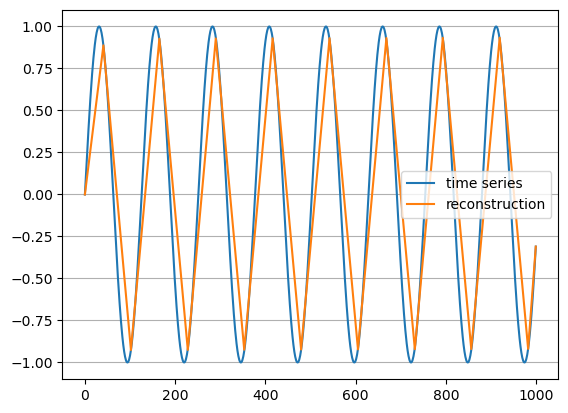

In [2]:
np.random.seed(1)
N = 100
ts = [np.sin(0.05*i) for i in range(1000)]          # original time series
fabba = fABBA(tol=0.1, alpha=0.1, sorting='norm', scl=1, verbose=0)
print(fabba)
string = fabba.fit_transform(ts)
print(string)
inverse_ts = fabba.inverse_transform(string, ts[0])
# print(inverse_ts)
plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.savefig('demo.png', bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
from fABBA import compress
from fABBA import inverse_compress
ts = [np.sin(0.05*i) for i in range(1000)]
pieces = compress(ts, tol=0.1)               # pieces is a list of the polygonal chain pieces
inverse_ts = inverse_compress(pieces, ts[0]) # reconstruct polygonal chain from pieces

In [4]:
from fABBA import digitize
from fABBA import inverse_digitize
string, parameters = digitize(pieces, alpha=0.1, sorting='2-norm', scl=1) # compression of the polygon
print(''.join(string))                                 # prints BbAaAaAaAaAaAaAaC

inverse_pieces = inverse_digitize(string, parameters)
inverse_ts = inverse_compress(inverse_pieces, ts[0])   # numerical time series reconstruction

aBbCbCbCbCbCbCbCA


In [5]:
from sklearn.cluster import KMeans
from fABBA import ABBAbase
kmeans = KMeans(n_clusters=5, random_state=0)
abba = ABBAbase(tol=0.1, scl=1, clustering=kmeans, verbose=0)
string = abba.fit_transform(ts)
print(string)

BbAaAaAaAaAaAaAaC


/home/research/xinyechen/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
from fABBA import ABBA
abba = ABBA(tol=0.1, scl=1, k=5, verbose=0)
string = abba.fit_transform(ts)
print(string)

BbAaAaAaAaAaAaAaC


[[41, 0.8873623686333753, 3.623003411811697], [61, -1.8131770509611074, 5.8943962439956685], [63, 1.8484188925670724, 5.8728642394271535], [63, -1.8419327359040158, 6.054176212988587], [62, 1.8542235811893586, 5.302255051945842], [63, -1.8667731343214715, 5.356342011408053], [63, 1.860673312874029, 5.528568456372766], [63, -1.8544419733481656, 5.703926225703669], [63, 1.848079556194011, 5.882365740983746], [63, -1.841586511126663, 6.063836552502616], [62, 1.8538910433278817, 5.31103376067976], [63, -1.86645423697901, 5.365359936911308], [63, 1.8603474578416228, 5.5377530052286215], [63, -1.8541091836582453, 5.713274801189928], [63, 1.8477398553691713, 5.891875700003599], [63, -1.8412399231779955, 6.073505206331632], [17, 0.6087035275438031, 0.03263000855400231]]


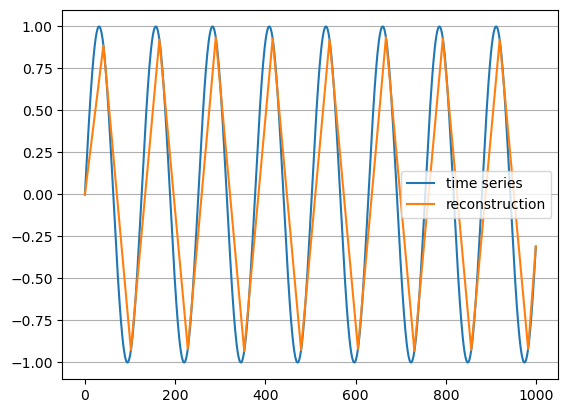

In [7]:
from fABBA import compress
from fABBA import inverse_compress

pieces = compress(ts, 0.1)
print(pieces)
inverse_ts = inverse_compress(pieces, ts[0])

plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [8]:
from fABBA import digitize
from fABBA import inverse_digitize
string, parameters = digitize(pieces, alpha=0.1, sorting='2-norm', scl=1) # compression of the polygon
print(''.join(string))                                 # prints BbAaAaAaAaAaAaAaC

inverse_pieces = inverse_digitize(string, parameters)
inverse_ts = inverse_compress(inverse_pieces, ts[0])   # numerical time series

aBbCbCbCbCbCbCbCA


## For image compression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fABBA.load_datasets import load_images
from fABBA import image_compress
from fABBA import image_decompress
from cv2 import resize

img_samples = load_images() # load fABBA image test samples
img = resize(img_samples[1], (100, 100)) # select the first image for test
fabba = fABBA(tol=0.1, alpha=0.01, sorting='2-norm', scl=1, verbose=1, max_len=-1)
strings = image_compress(fabba, img)
inverse_img = image_decompress(fabba, strings)

2024-05-31 15:17:11,301;INFO;Digitization: Reduced pieces of length 5764 to 1534  symbols


In [10]:
IMG = plt.imread('samples/img/n02101556_4241.jpg')

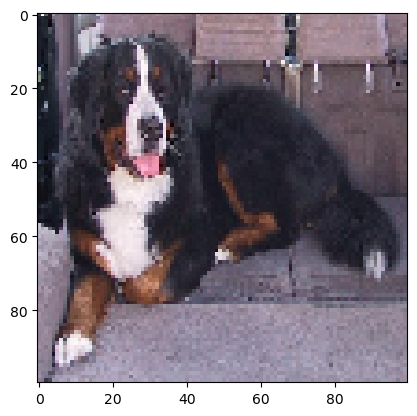

In [11]:
plt.imshow(img)
plt.savefig('img.png', bbox_inches='tight')
plt.show()

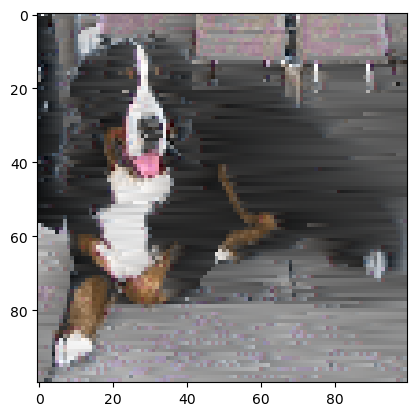

In [12]:
plt.imshow(inverse_img)
plt.savefig('inverse_img.png', bbox_inches='tight')
plt.show()

 ## For multivariate time series symbolization 

Generate 815 symbols


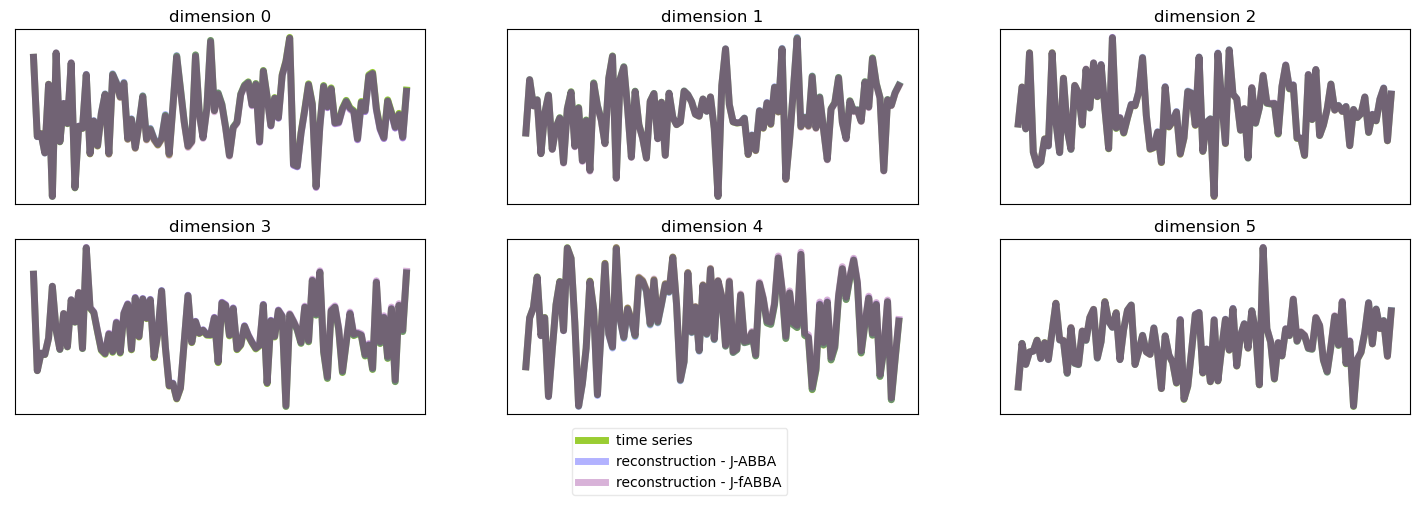

In [13]:
import os
from scipy.io import arff
from fABBA import JABBA
import matplotlib.pyplot as plt
import numpy as np


mts = np.random.randn(120, 100)
jabba1 = JABBA(tol=0.0002, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.0002, init='k-means', k=jabba1.parameters.centers.shape[0], verbose=0)
symbols_series = jabba2.fit_transform(mts)
reconstruction_ABBA = jabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(mts[i*3 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconstruction_ABBA[i*3 + j], c='blue', linewidth=5, alpha=0.3,label='reconstruction - J-ABBA')
        ax[i,j].plot(reconstruction[i*3 + j], c='purple', linewidth=5, alpha=0.3,label='reconstruction - J-fABBA')

        ax[i,j].set_title('dimension '+str(i*3 + j))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.5, -0.5], framealpha=0.45)
plt.show()

In [14]:
jabba1.parameters.centers.shape[0]

815

In [15]:
sum([i for i in range(len(symbols_series))])

7140

In [16]:
from fABBA import JABBA
import numpy as np
mts = np.random.randn(10, 20, 30) # 6000 time series values

jabba = JABBA(tol=0.01, alpha=0.01, verbose=1)
symbols = jabba.fit_transform(mts)
reconst = jabba.inverse_transform(symbols)
reconst_same_shape = jabba.recast_shape(reconst)
np.linalg.norm((mts - reconst_same_shape).reshape(-1, np.prod(mts.shape[1:])), 'fro')

Generate 666 symbols


5.080046828399327

In [17]:
mts[1, 1, 2:]

array([ 0.12787312, -0.36561999,  2.19915447,  0.56378499, -0.13903246,
        0.11081863,  1.54958887, -0.95155079, -1.27849856,  0.674707  ,
        1.5341501 , -1.09284644, -0.88779216,  1.20265407, -0.60138548,
       -0.84038378, -0.21032947, -0.24288773, -1.36859073,  0.17922164,
       -0.42818102, -0.20276829, -0.28050233, -0.82523812, -0.10777905,
       -0.00488046,  0.15091379,  1.57188879])

In [18]:
reconst_same_shape[1, 1, 2:]

array([ 0.12877619, -0.35966953,  2.20064089,  0.57664009, -0.11920851,
        0.11912174,  1.55776727, -0.93192127, -1.24483175,  0.69765061,
        1.55183316, -1.06417653, -0.87304774,  1.21373307, -0.59030648,
       -0.82296421, -0.20700422, -0.23796496, -1.36334005,  0.17024659,
       -0.43138585, -0.20880445, -0.28650799, -0.82369528, -0.11205394,
        0.01729248,  0.1466389 ,  1.55485151])

## For image or multidimensional array symbolization 

In [19]:
import cv2

im1 = cv2.imread('samples/img/n02101556_4241.jpg')
img1 =cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (100,100), interpolation = cv2.INTER_AREA)

im2= cv2.imread('samples/img/n02088094_3593.jpg')
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (100,100), interpolation = cv2.INTER_AREA)

In [20]:
img1.shape

(120, 120, 3)

In [21]:
img = np.asarray([img1, img2])

In [22]:
img.shape

(2, 120, 120, 3)

In [23]:
# For aggregation, init='agg' is default
jabba = JABBA(tol=0.001, alpha=0.1, verbose=1)
symbols = jabba.fit_transform(img)
reconst = jabba.inverse_transform(symbols) # convert into array
reconst_same_shape = jabba.recast_shape(reconst) # recast into original shape
np.linalg.norm((img - reconst_same_shape).reshape(-1, np.prod(img.shape[1:])), 'fro')

Generate 143 symbols


1758147.649342341

In [24]:
# For kmeans, init='k-means++'
jabba = JABBA(tol=0.001, k=100, init='kmeans', verbose=1) # use 100 distinct symbols
symbols = jabba.fit_transform(img)
reconst = jabba.inverse_transform(symbols) # convert into array
reconst_same_shape = jabba.recast_shape(reconst) # recast into original shape
np.linalg.norm((img - reconst_same_shape).reshape(-1, np.prod(img.shape[1:])), 'fro')

Generate 100 symbols


31252.170744902418

In [44]:
# For kmeans, init='k-means++'
jabba = JABBA(tol=0.0001, k=350, init='kmeans', verbose=1) # use 100 distinct symbols
symbols = jabba.fit_transform(img)
reconst = jabba.inverse_transform(symbols) # convert into array
reconst_same_shape = jabba.recast_shape(reconst) # recast into original shape
np.linalg.norm((img - reconst_same_shape).reshape(-1, np.prod(img.shape[1:])), 'fro')

Generate 350 symbols


565.0770359260647